# Riddler Classic 

## Can You Flip Your Way To Freedom?

**2020-05-01**: https://fivethirtyeight.com/features/can-you-flip-your-way-to-freedom/

From Bart Wright comes a rhetorical question from a famed soliloquy, “To flip, or not to flip?”:

You are locked in the dungeon of a faraway castle with three fellow prisoners (i.e., there are four prisoners in total), each in a separate cell with no means of communication. But it just so happens that all of you are logicians (of course).

To entertain themselves, the guards have decided to give you all a single chance for immediate release. Each prisoner will be given a fair coin, which can either be fairly flipped one time or returned to the guards without being flipped. If all flipped coins come up heads, you will all be set free! But if any of the flipped coins comes up tails, or if no one chooses to flip a coin, you will all be doomed to spend the rest of your lives in the castle’s dungeon.

The only tools you and your fellow prisoners have to aid you are random number generators, which will give each prisoner a random number, uniformly and independently chosen between zero and one.

What are your chances of being released?

*Extra credit:* Instead of four prisoners, suppose there are N prisoners. Now what are your chances of being released?

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
def get_prob_release_for_threshold(threshold, n_prisoners=4):
    '''
    Function that returns the probability of the prisoners being released when prisoners choose to flip a coin only if
    their number from the guards is above a certain threshold.
    
    Args:
        threshold (float): Threshold above which a prisoner will choose to flip a coin. For example, a threshold
        of .70 means a prisoner will decide to flip the fair coin if his randomly assigned number was greater .70.
                            
        n_prisoners (int): The number of prisoners involved in this "game".

    Returns:
        float: Returns a float between 0 and 1 that represents the probability of the prisoners being released.
    '''
    # We can ignore the probability of 0 coins being flipped because that leads to a loss.
    num_flips = np.arange(1, n_prisoners+1)
    dist = stats.binom(n_prisoners, (1-threshold))
    # Calculate the probability of 1 to n coins being flipped given the current threshold.
    p_num_flips = dist.pmf(num_flips)
    
    dist = stats.binom(num_flips, 0.5)
    # We want the probability of every flip coming up heads, given the number of flips. This leads to release.
    p_all_heads = dist.pmf(num_flips)
    
    return np.sum(p_num_flips * p_all_heads)

Let's visualize how the probability of the prisoners being released changes depending on the threshold selected.

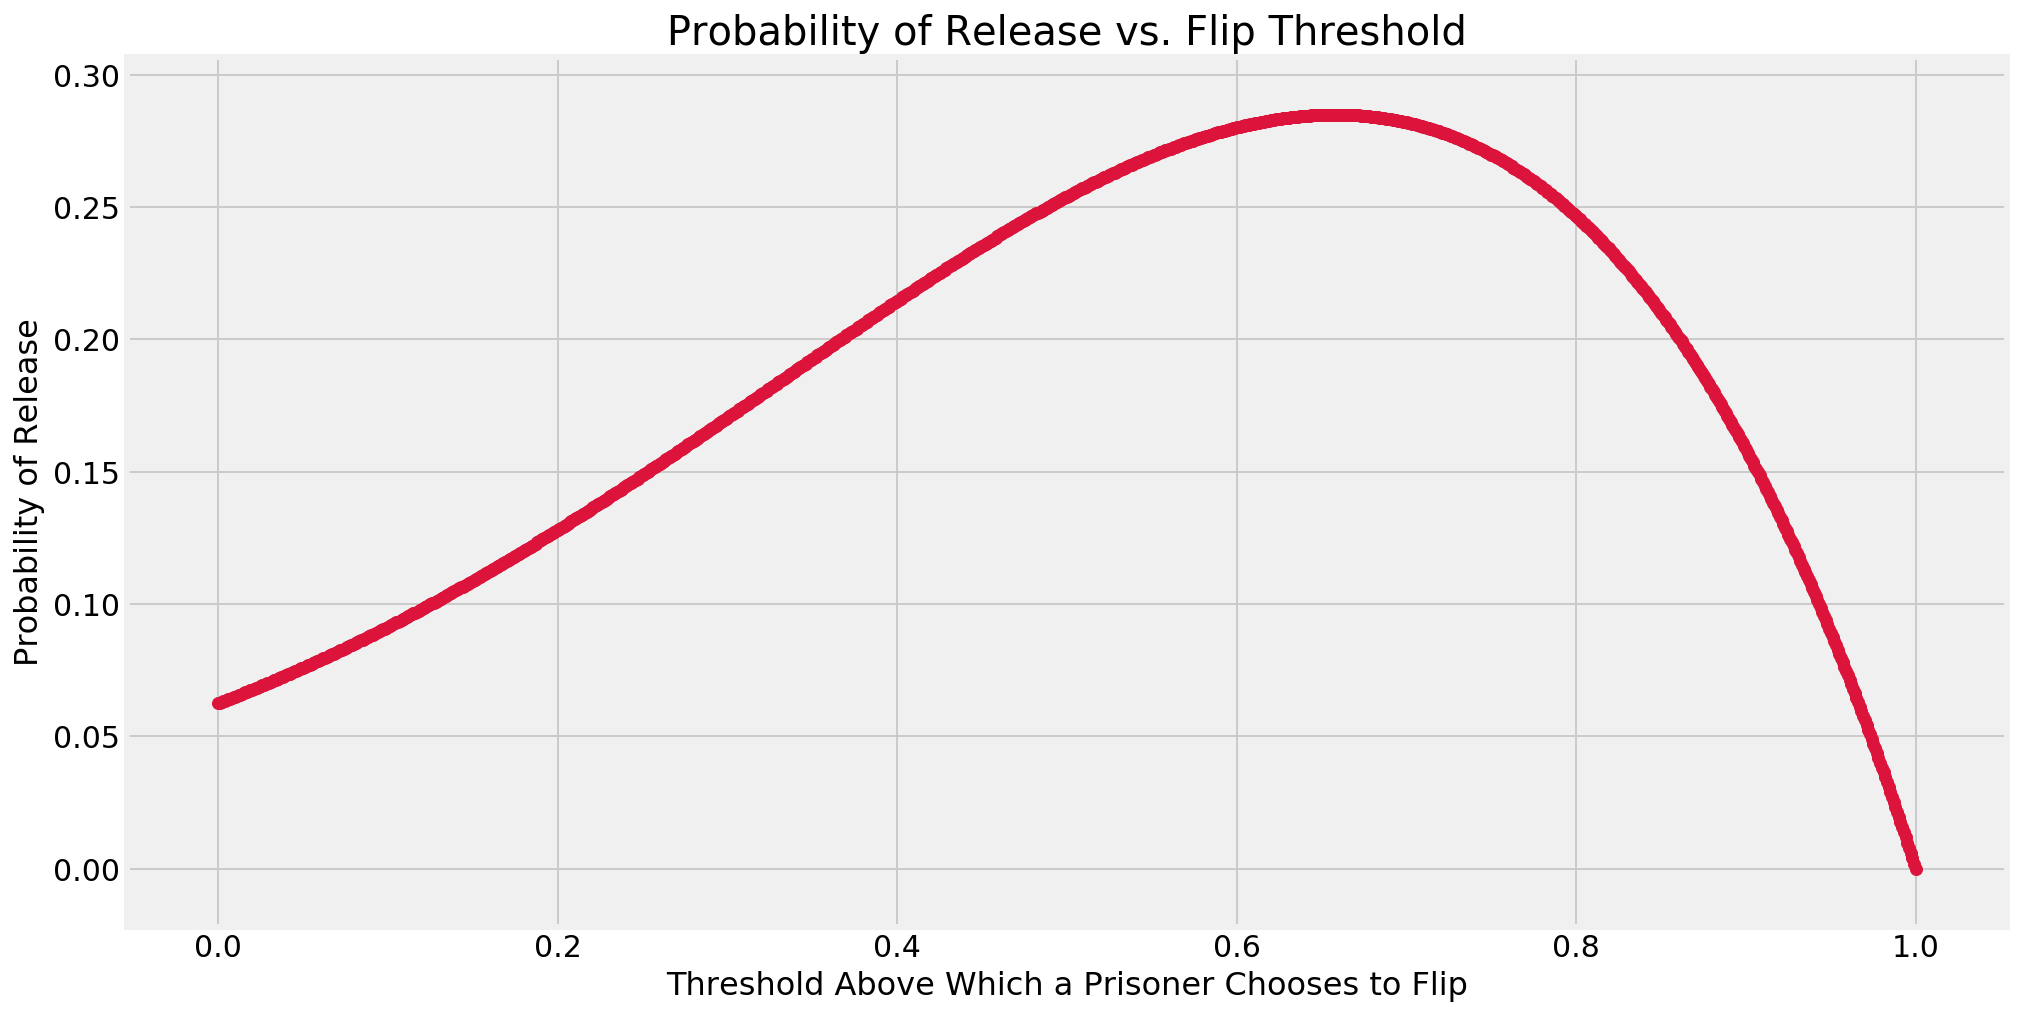

In [9]:
thresholds = np.linspace(0, 1.0, 1001)
p_release = np.zeros(1001)

for i, threshold in enumerate(thresholds):
    p_release[i] = get_prob_release_for_threshold(threshold)

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(thresholds, p_release, color='crimson')
ax.set_title('Probability of Release vs. Flip Threshold', fontsize=20)
ax.set_ylabel('Probability of Release', fontsize=16)
ax.tick_params(axis='y', labelsize=15);
ax.set_xlabel('Threshold Above Which a Prisoner Chooses to Flip', fontsize=16)
ax.tick_params(axis='x', labelsize=15);

Now let's write a function that will return the ideal threshold along with the probability of being released at that threshold. 

In [10]:
def get_best_prob_release(n_prisoners=4):
    thresholds = np.linspace(0, 1.0, 1001)
    p_release = np.zeros(1001)
    
    for i, threshold in enumerate(thresholds):
        p_release[i] = get_prob_release_for_threshold(threshold, n_prisoners=n_prisoners)
        
    best_i = np.argmax(p_release)
    # Let's return both the probability of release along with the threshold above which a prisoner should flip.
    return np.max(p_release), np.argmax(p_release)/1000

In [11]:
get_best_prob_release(n_prisoners=4)

(0.284842366785, 0.658)

Under the given conditions the prisoners will choose to flip the coin if their random number is above 0.658. This leads to approximately a 28.48% chance of release.

For curiosity's sake, let's see how the probability of release is affected by the number of prisoners. We should see that the ideal scenario is to have only 1 prisoner. With just 1 prisoner you know the probability of being released is 50%. There is no better chance for success than simply having 1 person flip a fair coin.

In [15]:
n_prisoners = np.arange(1, 11)
p_release = np.zeros(10)
threshold_best = np.zeros(10)

for i, n in enumerate(n_prisoners):
    prob, threshold = get_best_prob_release(n_prisoners=n)
    p_release[i] = prob
    threshold_best[i] = threshold    

### Simulation

Before deciding to find an exact solution I wrote a simulation of the prisoner's scenario. The code is included below.

In [2]:
def simulate_release_probability(n_prisoners=4, threshold=0.75, n_sims=5*10**6):
    # Each of the 4 prisoners is assigned a random number between 0 and 1.
    nums = np.random.random(size=(n_sims, n_prisoners))
    # Prisoners flip the coin if they're above a certain threshold.
    is_flipping = nums > threshold
    # For every prisoner flipping, see if they got a 1 (heads) from a fair coin.
    flip_results = np.random.binomial(is_flipping, .5)
    # For each simulation we need to make sure at least 1 prisoner flipped.
    someone_flipped = np.any(is_flipping, axis=1)
    # Every prisoner who flipped must have gotten heads in order for the group to be released.
    all_heads = np.all(np.where(is_flipping, flip_results, 1), axis=1)
    
    released = someone_flipped & all_heads
    
    return np.mean(released)